In [1]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies = pd.read_csv("imdb_movies.csv")

pd.set_option("display.max.rows",50)
pd.set_option("display.max.columns",22)


In [3]:
movies[movies.duplicated()]
movies.drop_duplicates(inplace=True)
movies.dropna(subset="genres",inplace=True)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

In [5]:
movies["profit"]=movies["revenue"]-movies["budget"]
movies_genres_df= movies[["popularity","budget","revenue","original_title","runtime","genres","release_date","vote_count","vote_average","profit"]]

In [6]:
split=movies_genres_df["genres"].str.split("|")
split2=split.apply(Series,1).stack()
split2.index=split2.index.droplevel(-1)
split2.name="genres_split"
del movies_genres_df["genres"]
movies_genres_df=movies_genres_df.join(split2)

C:\Users\Farzane\AppData\Local\Temp\ipykernel_6832\172043067.py:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split2=split.apply(Series,1).stack()


The most common genres by the number of movies made


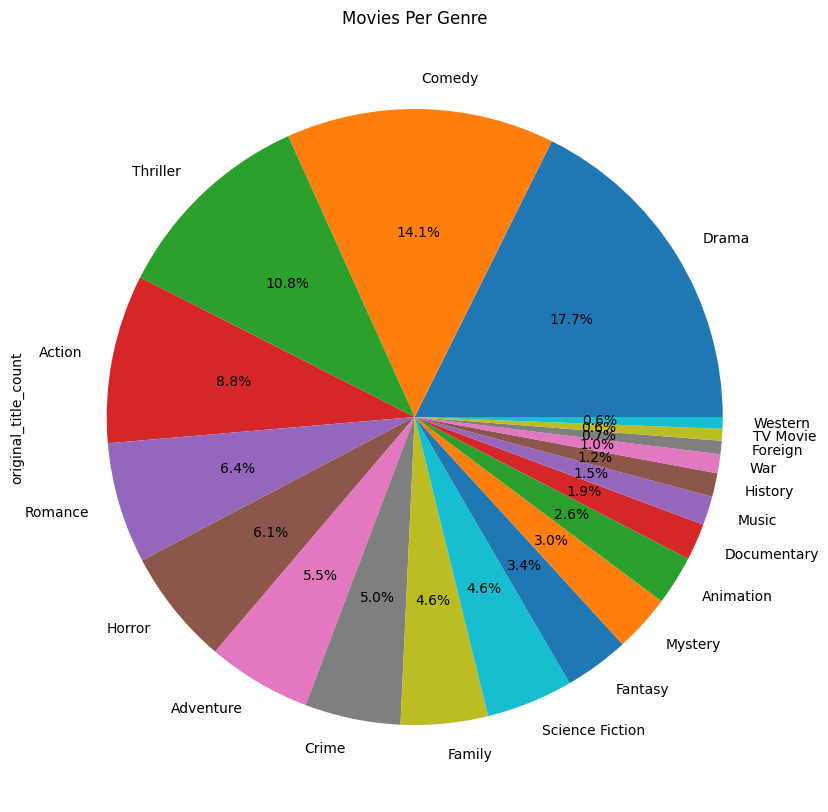

In [7]:
movies_common=movies_genres_df.groupby("genres_split")["original_title"].count().sort_values(ascending=False)
movies_common_df = movies_common.reset_index(name='count')
movies_common_df.columns = ['genres_split', 'original_title_count']
movies_common_df.set_index('genres_split', inplace=True)
movies_common_df["original_title_count"].plot.pie(title="Movies Per Genre",autopct="%1.1f%%",figsize=(10,10));

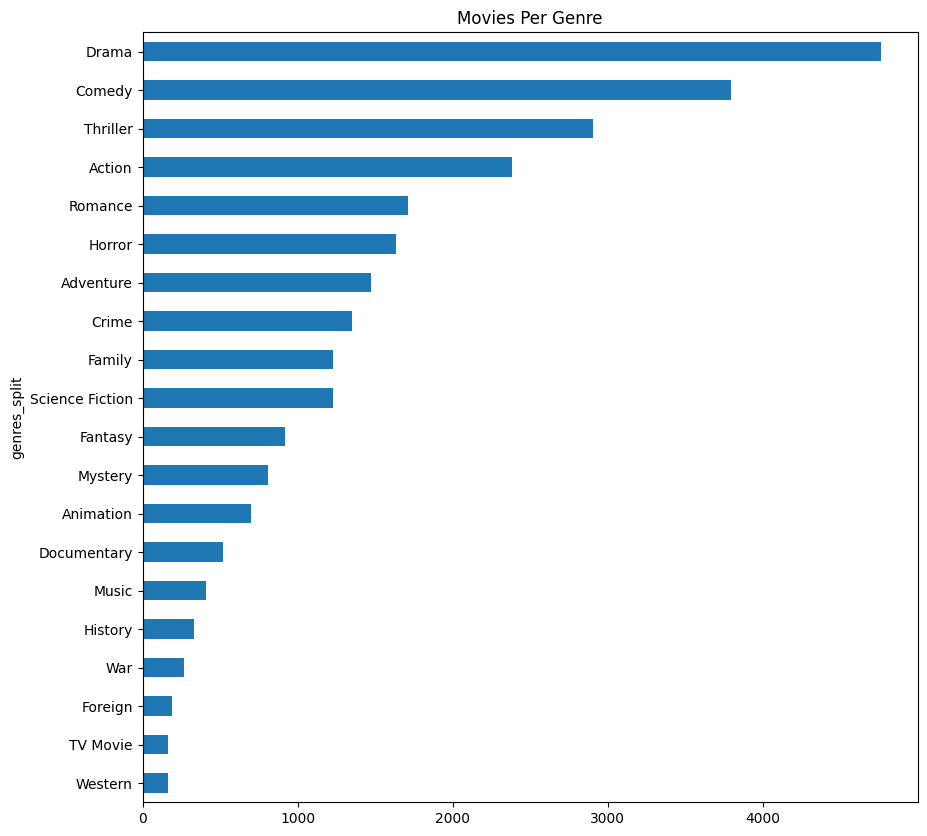

In [12]:

movies_common_df.sort_values(by='original_title_count',ascending=True,inplace=True)
movies_common_df["original_title_count"].plot.barh(title="Movies Per Genre", figsize=(10, 10));


The highest average revenue and budget

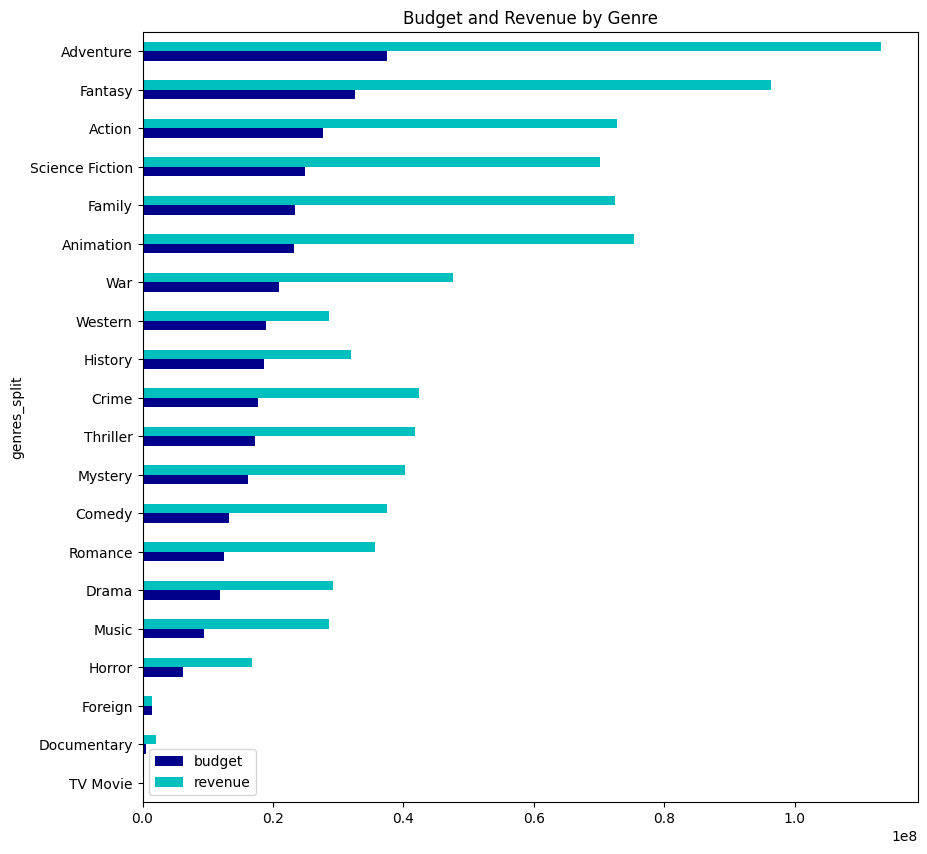

In [11]:
genres_avg_bud_rev_df=movies_genres_df.groupby("genres_split")[["budget","revenue"]].mean().sort_values(by="budget",ascending=False)
pd.options.display.float_format = "{:,.2f}".format
genres_avg_bud_rev_df.sort_values(by='budget',ascending=True,inplace=True)
genres_avg_bud_rev_df[["budget","revenue"]].plot.barh(title="Budget and Revenue by Genre",color=("DarkBlue","c"),figsize=(10, 10));


The highest average profit

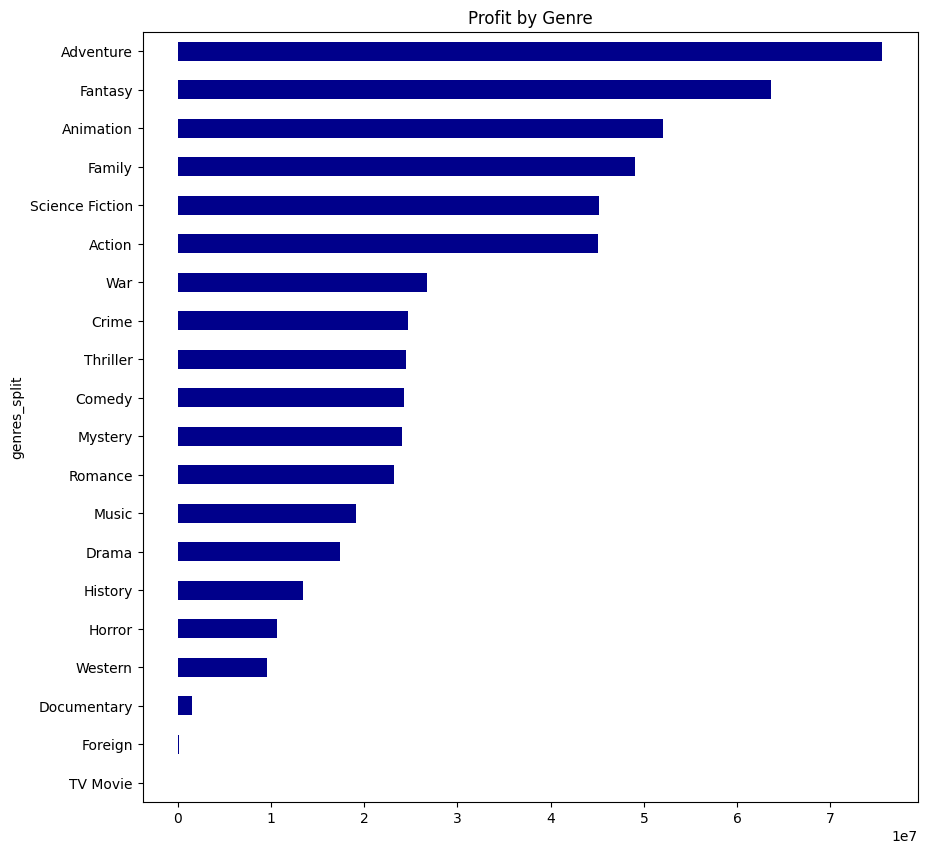

In [13]:
genres_avg_profit=movies_genres_df.groupby("genres_split")["profit"].mean()
genres_avg_profit_df = genres_avg_profit.reset_index(name='profit')
genres_avg_profit_df.set_index('genres_split', inplace=True)
genres_avg_profit_df.sort_values(by='profit',ascending=True,inplace=True)
genres_avg_profit_df["profit"].plot.barh(title="Profit by Genre",color=("DarkBlue"),figsize=(10, 10));

The highest average popularity

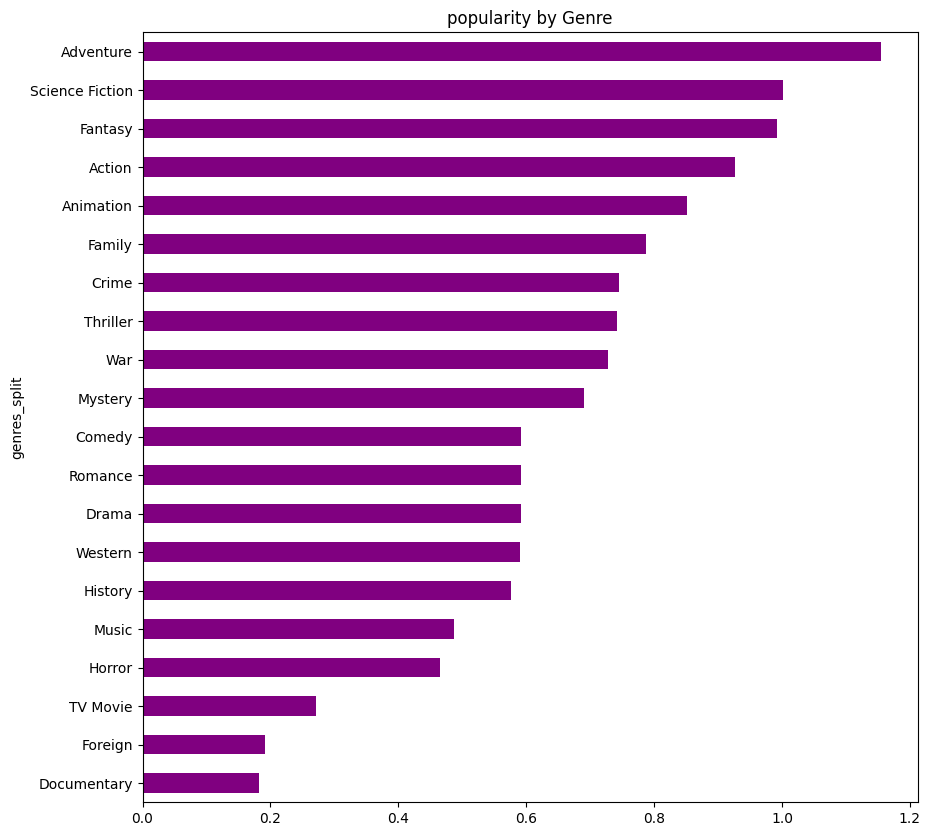

In [14]:
genres_avg_popularity=movies_genres_df.groupby("genres_split")["popularity"].mean()
genres_avg_popularity_df = genres_avg_popularity.reset_index(name='popularity')
genres_avg_popularity_df.set_index('genres_split', inplace=True)
genres_avg_popularity_df.sort_values(by='popularity',ascending=True,inplace=True)
genres_avg_popularity_df["popularity"].plot.barh(title="popularity by Genre",color=("Purple"),figsize=(10, 10));

The genres with the highest number of movies with an voting avg >=8

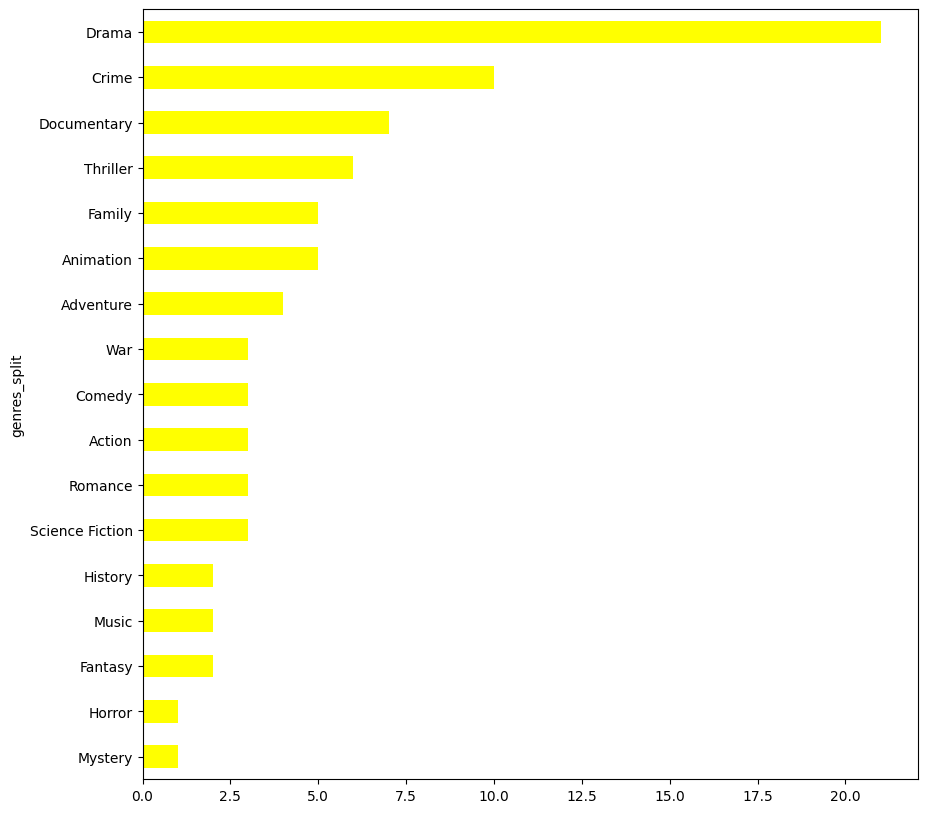

In [15]:
vote_movies_df=movies_genres_df[(movies_genres_df["vote_count"]>=50) & (movies_genres_df["vote_average"]>=8)]
genres_avg_voting_df=vote_movies_df.groupby("genres_split")["original_title"].count()
genres_avg_voting_df = genres_avg_voting_df.reset_index(name='count')
genres_avg_voting_df.set_index('genres_split', inplace=True)
genres_avg_voting_df.sort_values(by='count',ascending=True,inplace=True)
genres_avg_voting_df["count"].plot.barh(color=("Yellow"),figsize=(10, 10));

Research Hypotheses: 


1.The best movies according to vote avg. return high profit and revenue.

2.The best movies according to popularity avg. return high profit and revenue.

3.Highly budgeted movies return high revenue and profit.

4.Highly budgeted movies have a high popularity.

In [16]:
movies_genres_df2= movies[["popularity","budget","revenue","vote_count","vote_average","profit"]]
movies_genres_df3=movies_genres_df2[movies_genres_df2["vote_count"]>=50]
movies_genres_df3.corr(method="spearman")

,popularity,budget,revenue,vote_count,vote_average,profit
popularity,1.00,0.48,0.59,0.77,0.19,0.50
budget,0.48,1.00,0.71,0.55,-0.04,0.33
revenue,0.59,0.71,1.00,0.68,0.11,0.84
vote_count,0.77,0.55,0.68,1.00,0.29,0.58
vote_average,0.19,-0.04,0.11,0.29,1.00,0.20
profit,0.50,0.33,0.84,0.58,0.20,1.00


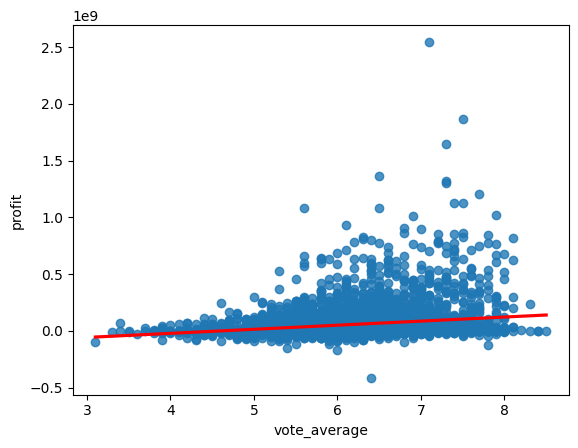

In [18]:
sns.regplot(x="vote_average",y="profit",data=movies_genres_df3,line_kws={"color":"red"});

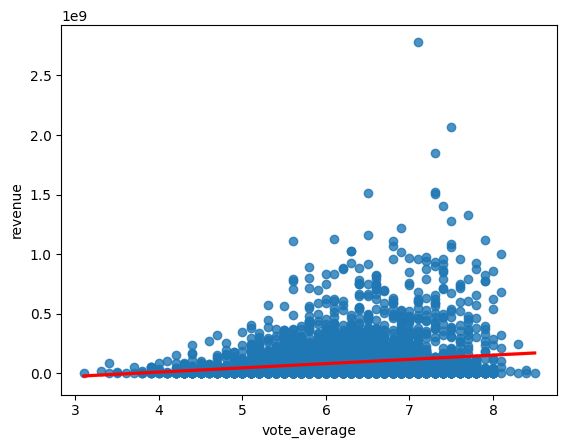

In [19]:
sns.regplot(x="vote_average",y="revenue",data=movies_genres_df3,line_kws={"color":"red"});

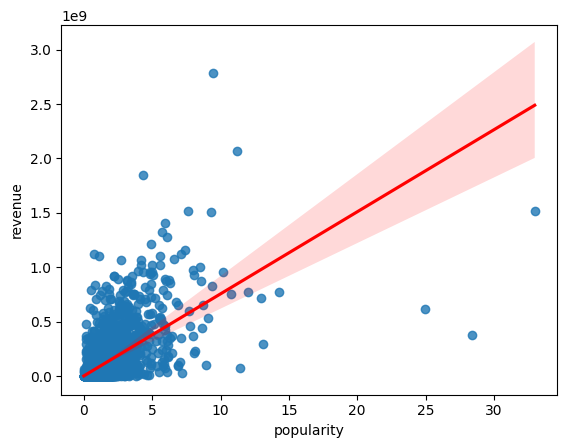

In [20]:
sns.regplot(x="popularity",y="revenue",data=movies_genres_df3,line_kws={"color":"red"});

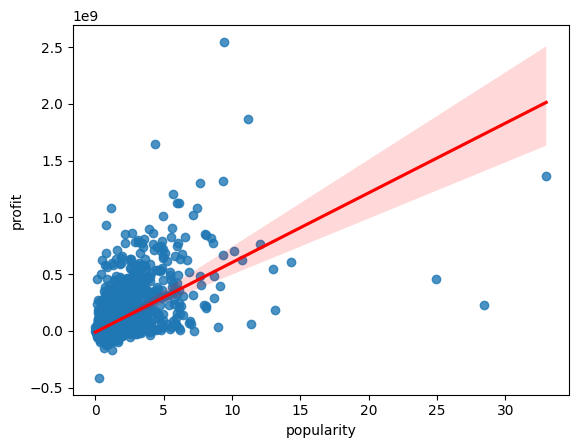

In [22]:
sns.regplot(x="popularity",y="profit",data=movies_genres_df3,line_kws={"color":"red"});

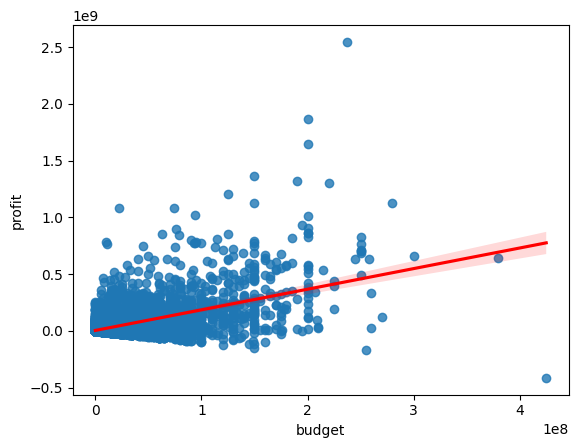

In [23]:
sns.regplot(x="budget",y="profit",data=movies_genres_df3,line_kws={"color":"red"});

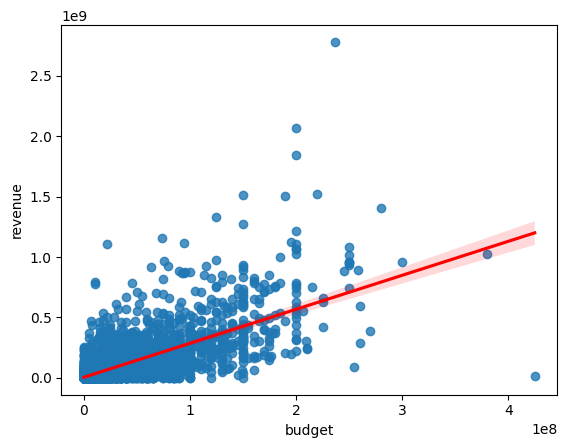

In [25]:
sns.regplot(x="budget",y="revenue",data=movies_genres_df3,line_kws={"color":"red"});

In [26]:
movies_genres_year= movies[["original_title","genres","release_year","profit"]]
split__1=movies_genres_year["genres"].str.split("|")
split__2=split__1.apply(Series,1).stack()
split__2.index=split__2.index.droplevel(-1)
split__2.name="genres_split"
del movies_genres_year["genres"]
movies_genres_year=movies_genres_year.join(split__2)


C:\Users\Farzane\AppData\Local\Temp\ipykernel_6832\1799237992.py:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split__2=split__1.apply(Series,1).stack()


In [27]:
time_genre=movies_genres_year.groupby(["release_year","genres_split"])["profit"].mean()
time_genre_df=pd.DataFrame(time_genre)
time_genre_pt=pd.pivot_table(time_genre_df,values="profit",index="genres_split",columns="release_year")


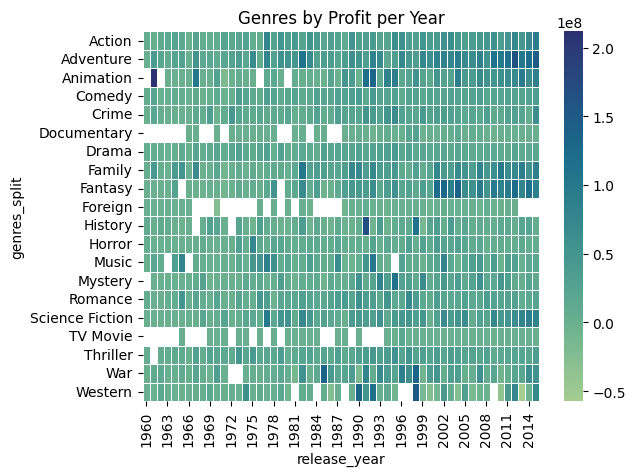

In [28]:
sns.heatmap(time_genre_pt,cmap="crest",linewidths=0.7)
plt.title("Genres by Profit per Year")
plt.show()